In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.datasets import load_iris
iris_data = load_iris()

In [2]:
iris_data

{'DESCR': 'Iris Plants Database\n====================\n\nNotes\n-----\nData Set Characteristics:\n    :Number of Instances: 150 (50 in each of three classes)\n    :Number of Attributes: 4 numeric, predictive attributes and the class\n    :Attribute Information:\n        - sepal length in cm\n        - sepal width in cm\n        - petal length in cm\n        - petal width in cm\n        - class:\n                - Iris-Setosa\n                - Iris-Versicolour\n                - Iris-Virginica\n    :Summary Statistics:\n\n    ============== ==== ==== ======= ===== ====================\n                    Min  Max   Mean    SD   Class Correlation\n    ============== ==== ==== ======= ===== ====================\n    sepal length:   4.3  7.9   5.84   0.83    0.7826\n    sepal width:    2.0  4.4   3.05   0.43   -0.4194\n    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)\n    petal width:    0.1  2.5   1.20  0.76     0.9565  (high!)\n    ============== ==== ==== ======= ===== ==

In [3]:
x=pd.DataFrame(iris_data.data)
y=pd.DataFrame(iris_data.target)
x.columns = [s.strip(' (cm)') for s in iris_data.feature_names]
y.columns = ["species"]
df = pd.concat([x,y],axis=1)
df.head(3)

,sepal length,sepal width,petal length,petal width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0


# Problem 1
Select features and categories for practice

In [4]:
df.shape

(150, 5)

In [5]:
df.columns

Index(['sepal length', 'sepal width', 'petal length', 'petal width',
       'species'],
      dtype='object')

In [6]:
data = df.loc[df['species'].isin([1, 2]),('sepal length','petal length','species')].reset_index(drop=True)
data.loc[data.species == 2,'species'] = 0
print(data.shape)
data.tail(3)

(100, 3)


,sepal length,petal length,species
97,6.5,5.2,0
98,6.2,5.4,0
99,5.9,5.1,0


# Problem 2
Data analysis

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
sepal length    100 non-null float64
petal length    100 non-null float64
species         100 non-null int32
dtypes: float64(2), int32(1)
memory usage: 2.0 KB


In [8]:
data.iloc[:,0:2].describe()

,sepal length,petal length
count,100.000000,100.000000
mean,6.262000,4.906000
std,0.662834,0.825578
min,4.900000,3.000000
25%,5.800000,4.375000
50%,6.300000,4.900000
75%,6.700000,5.525000
max,7.900000,6.900000


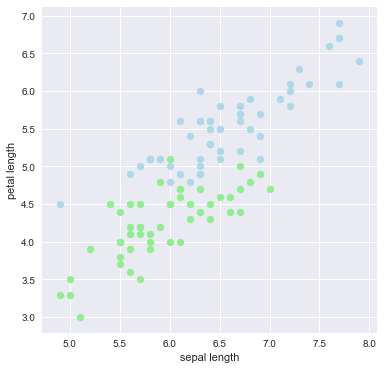

In [9]:
fig, ax = plt.subplots(1,1,figsize=(6,6))
ax.scatter(data.loc[data['species']==1,'sepal length'],data.loc[data['species']==1,'petal length'],color='lightgreen')
ax.scatter(data.loc[data['species']==0,'sepal length'],data.loc[data['species']==0,'petal length'],color='lightblue')
ax.set_xlabel('sepal length')
ax.set_ylabel('petal length')
plt.show()

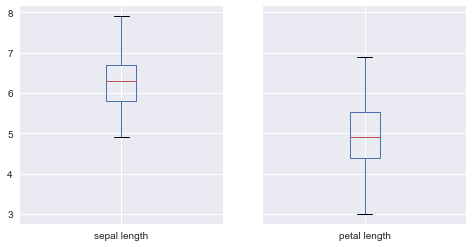

In [10]:
fig, ax = plt.subplots(1,2,figsize=(8,4),sharey=True)
data.boxplot(column=data.columns[0], ax=ax[0]) 
data.boxplot(column=data.columns[1], ax=ax[1])
plt.show()

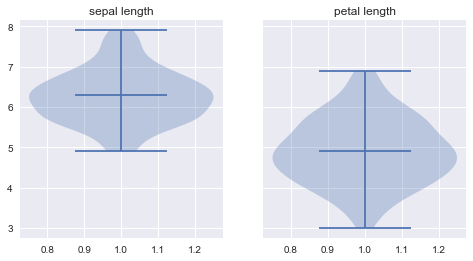

In [11]:
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(8,4),sharey=True)
ax1.violinplot(data[data.columns[0]], showmedians=True)
ax1.set_title(data.columns[0])
ax2.violinplot(data[data.columns[1]], showmedians=True)
ax2.set_title(data.columns[1])
plt.show()

# Problem 3
Division of preprocessing/training data and verification data

In [12]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(data.iloc[:,0:2],data.iloc[:,2],test_size=0.25,random_state=30)

In [13]:
x_train = x_train.reset_index(drop=True)
x_test = x_test.reset_index(drop=True)
y_train = y_train.reset_index(drop=True)
y_test = y_test.reset_index(drop=True)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(75, 2)
(25, 2)
(75,)
(25,)


# Problem 4
Pretreatment/Standardization

In [14]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
# fit training data
scaler.fit(x_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [15]:
xs_train = scaler.transform(x_train)
xs_test = scaler.transform(x_test)

In [16]:
print(xs_train[0:3])

[[ 0.30969543  0.84170697]
 [ 0.30969543  0.97295026]
 [ 0.30969543 -0.73321252]]


# Problem 5
Learning and estimation

In [17]:
from sklearn.neighbors import KNeighborsClassifier

In [18]:
knc = KNeighborsClassifier(n_neighbors=3)
knc.fit(xs_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')

# Problem 6
Evaluation

In [19]:
y_pred = knc.predict(xs_test)
y_pred

array([1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 1])

In [20]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

In [21]:
# accuracy
accuracy_score(y_test, y_pred)

0.92000000000000004

Accuracy is the metric shows the how many percentage of the prediction is true. (TP+TN)/N

In [22]:
# precision
precision_score(y_test, y_pred)

0.84615384615384615

Precision is the percentage of correctly predicted positives from all predictions labeled positive. TP/(TP+FP)  

In [23]:
# recall
recall_score(y_test, y_pred)

1.0

Recall (also called sensitivity in binary classification) is the metric shows the fraction of correctly predicted positives from all positive labeled observations. TP/(TP+FN)

In [24]:
# f1-score
f1_score(y_test, y_pred)

0.91666666666666663

F1-score is the metric of overall how well the prediction algorithm works. 

In [25]:
# confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[12,  2],
       [ 0, 11]])

tn, fp, fn, tp <br\>
TRUE NEGATIVE - TN <br\>
FALSE POSITIVE - FP <br\>
FALSE NEGATIVE - FN <br\>
TRUE POSITIVE - TP <br\>
Our labeling 1-versicolor, 0-virginica. <br\>
TN is the number of correctly predicted 0s. <br\>
FP is the number of incorrectly predicted as 1s, true value is 0.<br\>
FN is the number of incorrectly predicted as 0s, true value is 1.<br\>
TP is the number of correctly predicted 1s. <br\>
tn = 12, fp = 2, fn = 0, tp = 11

# Problem 7
Visualization

In [26]:
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches
def decision_region(X, y, model, step=0.01, title='decision region', xlabel='xlabel', ylabel='ylabel', target_names=['virginica','versicolor']):
    """
    Draw the determination area of the model that learned binary classification with two-dimensional features.
    The background color is drawn from the estimated values of the trained model.
    The points on the scatter plot are training or validation data.
    Parameters
    ----------------
    X : ndarray, shape(n_samples, 2)
        Feature value
    y : ndarray, shape(n_samples,)
        label
    model : object
        Insert the installed model of the learned model
    step : float, (default : 0.1)
        Set the interval to calculate the estimate
    title : str
        Give the text of the graph Title
    xlabel, ylabel : str
        Give the text of the axis label
    target_names= : list of str
        Give a list of legends
    """
    # setting
    scatter_color = ['red', 'blue']
    contourf_color = ['pink', 'skyblue']
    n_class = 2
    # pred
    mesh_f0, mesh_f1  = np.meshgrid(np.arange(np.min(X[:,0])-0.5, np.max(X[:,0])+0.5, step), np.arange(np.min(X[:,1])-0.5, np.max(X[:,1])+0.5, step))
    mesh = np.c_[np.ravel(mesh_f0),np.ravel(mesh_f1)]
    y_pred = model.predict(mesh).reshape(mesh_f0.shape)
    # plot
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.contourf(mesh_f0, mesh_f1, y_pred, n_class-1, cmap=ListedColormap(contourf_color))
    plt.contour(mesh_f0, mesh_f1, y_pred, n_class-1, colors='y', linewidths=3, alpha=0.5)
    for i, target in enumerate(set(y)):
        plt.scatter(X[y==target][:, 0], X[y==target][:, 1], s=80, color=scatter_color[i], label=target_names[i], marker='o')
    patches = [mpatches.Patch(color=scatter_color[i], label=target_names[i]) for i in range(n_class)]
    plt.legend(handles=patches)
    plt.legend()
    plt.show()

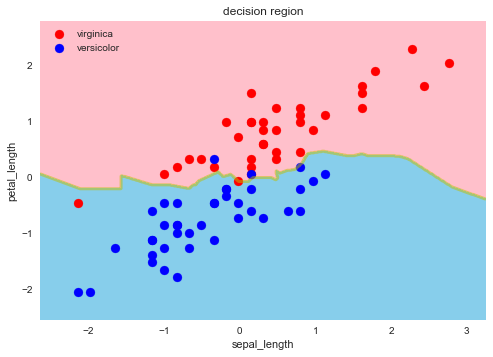

In [27]:
decision_region(xs_train,y_train,model=knc,xlabel='sepal_length',ylabel='petal_length')

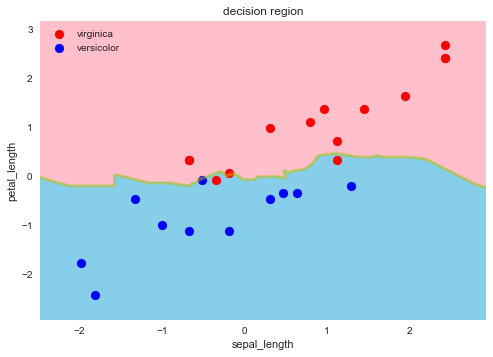

In [28]:
decision_region(xs_test,y_test,model=knc,xlabel='sepal_length',ylabel='petal_length')

# Problem 8
Learning by other methods

In [29]:
# logictic regression
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(random_state=0).fit(xs_train, y_train)
y_logreg = logreg.predict(xs_test)

In [30]:
# SVC
from sklearn.pipeline import make_pipeline
from sklearn.svm import SVC
svm = make_pipeline(StandardScaler(), SVC(gamma='auto')).fit(xs_train, y_train)
y_svc = svm.predict(xs_test)

In [31]:
# decision tree
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state=0).fit(xs_train,y_train)
y_dt = dt.predict(xs_test)

In [32]:
#random forest
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(max_depth=2, random_state=0).fit(xs_train,y_train)
y_rf = rf.predict(xs_test)

In [33]:
# all predicted values
y_all = pd.concat([y_test,pd.DataFrame(y_pred),pd.DataFrame(y_logreg),pd.DataFrame(y_svc),pd.DataFrame(y_dt),pd.DataFrame(y_rf)],axis=1)
y_all.columns = ['true','KN','LogReg','SVM','DecTree','RandFor']
y_all

,true,KN,LogReg,SVM,DecTree,RandFor
0,1,1,1,1,0,1
1,0,1,0,1,1,0
2,1,1,1,1,1,1
3,0,0,0,0,0,0
4,1,1,1,1,1,1
5,0,0,0,0,0,0
6,1,1,1,1,1,1
7,0,1,1,1,0,1
8,0,0,0,0,0,0
9,0,0,0,0,0,0


In [34]:
metrics = pd.DataFrame(index=['acc','prec','rec','f1'], columns=['3nn','log','svm','dtree','randf'])

In [35]:
metrics.loc['acc','3nn']=accuracy_score(y_test, y_pred)
metrics.loc['prec','3nn']=precision_score(y_test, y_pred)
metrics.loc['rec','3nn']=recall_score(y_test, y_pred)
metrics.loc['f1','3nn']=f1_score(y_test, y_pred)

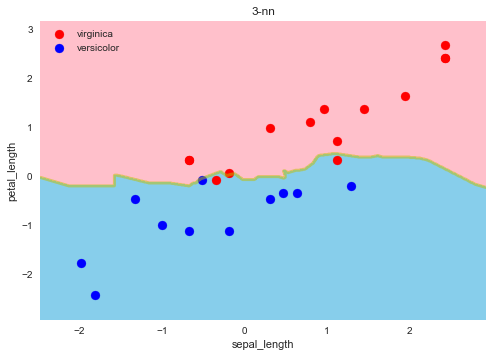

In [36]:
decision_region(xs_test,y_test,model=knc, title='3-nn',xlabel='sepal_length',ylabel='petal_length')

In [37]:
metrics.loc['acc','log']=accuracy_score(y_test, y_logreg)
metrics.loc['prec','log']=precision_score(y_test, y_logreg)
metrics.loc['rec','log']=recall_score(y_test, y_logreg)
metrics.loc['f1','log']=f1_score(y_test, y_logreg)

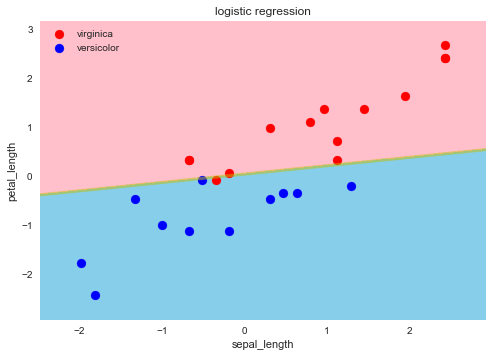

In [38]:
decision_region(xs_test,y_test,model=logreg, title='logistic regression',xlabel='sepal_length',ylabel='petal_length')

In [39]:
metrics.loc['acc','svm']=accuracy_score(y_test, y_svc)
metrics.loc['prec','svm']=precision_score(y_test, y_svc)
metrics.loc['rec','svm']=recall_score(y_test, y_svc)
metrics.loc['f1','svm']=f1_score(y_test, y_svc)

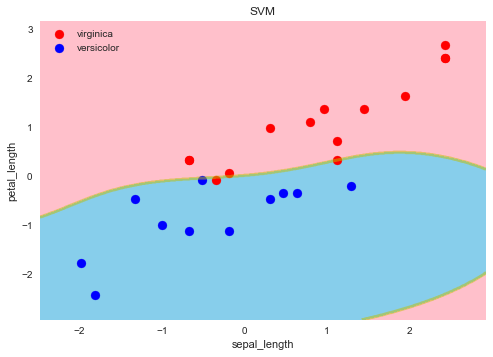

In [40]:
decision_region(xs_test,y_test,model=svm, title='SVM',xlabel='sepal_length',ylabel='petal_length')

In [41]:
metrics.loc['acc','dtree']=accuracy_score(y_test, y_dt)
metrics.loc['prec','dtree']=precision_score(y_test, y_dt)
metrics.loc['rec','dtree']=recall_score(y_test, y_dt)
metrics.loc['f1','dtree']=f1_score(y_test, y_dt)

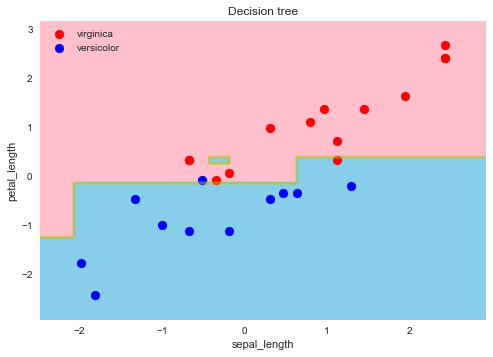

In [42]:
decision_region(xs_test,y_test,model=dt, title='Decision tree',xlabel='sepal_length',ylabel='petal_length')

In [43]:
metrics.loc['acc','randf']=accuracy_score(y_test, y_rf)
metrics.loc['prec','randf']=precision_score(y_test, y_rf)
metrics.loc['rec','randf']=recall_score(y_test, y_rf)
metrics.loc['f1','randf']=f1_score(y_test, y_rf)

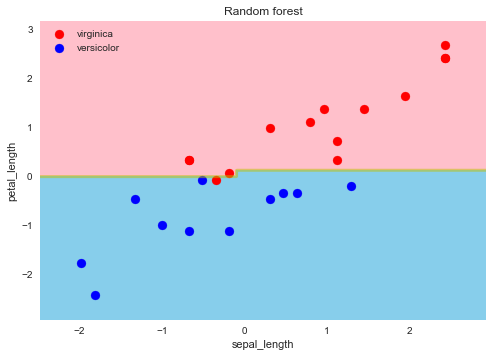

In [44]:
decision_region(xs_test,y_test,model=rf, title='Random forest',xlabel='sepal_length',ylabel='petal_length')

In [45]:
metrics

,3nn,log,svm,dtree,randf
acc,0.92,0.96,0.92,0.92,0.96
prec,0.846154,0.916667,0.846154,0.909091,0.916667
rec,1,1,1,0.909091,1
f1,0.916667,0.956522,0.916667,0.909091,0.956522


Overally, logistic regression and random forest is performing better than others. <br\>
Decision tree is performs the worst. 

# Problem 9
 (Advanced task) Comparison with and without standardization

In [46]:
metrics2 = pd.DataFrame(index=['acc','prec','rec','f1'], columns=['3nn','log','svm','dtree','randf'])

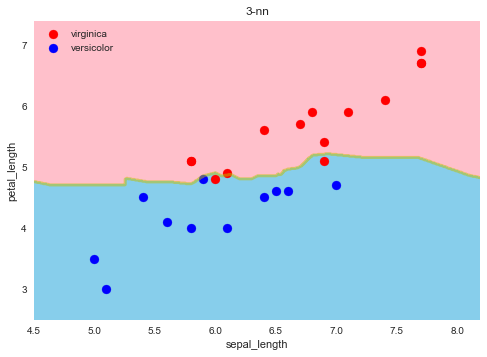

In [47]:
knc2 = KNeighborsClassifier(n_neighbors=3)
knc2.fit(x_train,y_train)
## for decision_region function
## dataframe to ndarray
xx_test = np.array(x_test)
y_pred2 = knc2.predict(xx_test)
metrics2.loc['acc','3nn']=accuracy_score(y_test, y_pred2)
metrics2.loc['prec','3nn']=precision_score(y_test, y_pred2)
metrics2.loc['rec','3nn']=recall_score(y_test, y_pred2)
metrics2.loc['f1','3nn']=f1_score(y_test, y_pred2)
decision_region(xx_test,y_test,model=knc2, title='3-nn',xlabel='sepal_length',ylabel='petal_length')

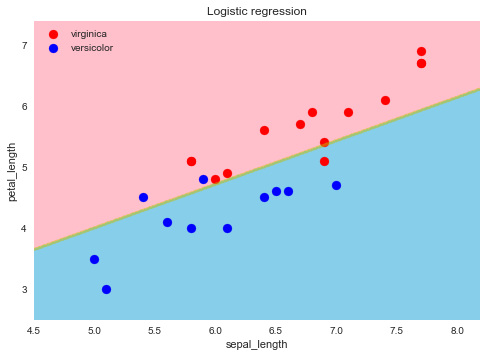

In [48]:
logreg2 = LogisticRegression(random_state=0).fit(x_train, y_train)
y_logreg2 = logreg2.predict(xx_test)
metrics2.loc['acc','log']=accuracy_score(y_test, y_logreg2)
metrics2.loc['prec','log']=precision_score(y_test, y_logreg2)
metrics2.loc['rec','log']=recall_score(y_test, y_logreg2)
metrics2.loc['f1','log']=f1_score(y_test, y_logreg2)
decision_region(xx_test,y_test,model=logreg2, title='Logistic regression',xlabel='sepal_length',ylabel='petal_length')

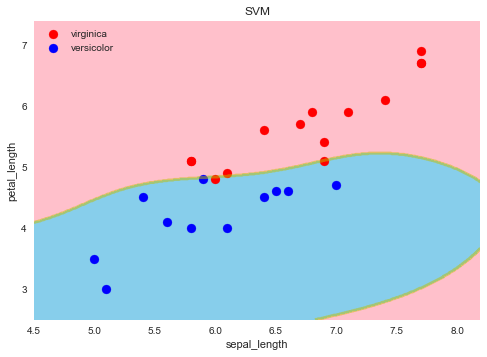

In [49]:
svm2 = make_pipeline(StandardScaler(), SVC(gamma='auto')).fit(x_train, y_train)
y_svc2 = svm2.predict(xx_test)
metrics2.loc['acc','svm']=accuracy_score(y_test, y_svc2)
metrics2.loc['prec','svm']=precision_score(y_test, y_svc2)
metrics2.loc['rec','svm']=recall_score(y_test, y_svc2)
metrics2.loc['f1','svm']=f1_score(y_test, y_svc2)
decision_region(xx_test,y_test,model=svm2, title='SVM',xlabel='sepal_length',ylabel='petal_length')

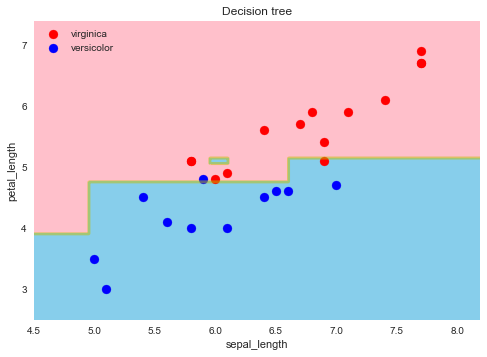

In [50]:
dt2 = DecisionTreeClassifier(random_state=0).fit(x_train,y_train)
y_dt2 = dt2.predict(xx_test)
metrics2.loc['acc','dtree']=accuracy_score(y_test, y_dt2)
metrics2.loc['prec','dtree']=precision_score(y_test, y_dt2)
metrics2.loc['rec','dtree']=recall_score(y_test, y_dt2)
metrics2.loc['f1','dtree']=f1_score(y_test, y_dt2)
decision_region(xx_test,y_test,model=dt2, title='Decision tree',xlabel='sepal_length',ylabel='petal_length')

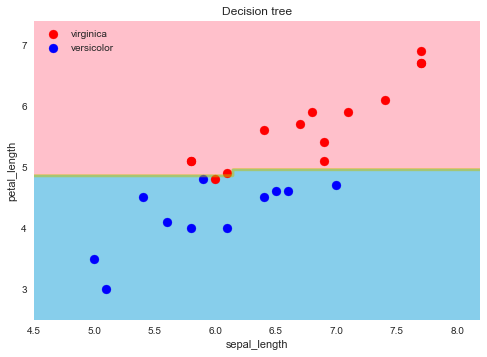

In [51]:
rf2 = RandomForestClassifier(max_depth=2, random_state=0).fit(x_train,y_train)
y_rf2 = rf2.predict(xx_test)
metrics2.loc['acc','randf']=accuracy_score(y_test, y_rf2)
metrics2.loc['prec','randf']=precision_score(y_test, y_rf2)
metrics2.loc['rec','randf']=recall_score(y_test, y_rf2)
metrics2.loc['f1','randf']=f1_score(y_test, y_rf2)
decision_region(xx_test,y_test,model=rf2, title='Decision tree',xlabel='sepal_length',ylabel='petal_length')

In [52]:
# without standardization
metrics2

,3nn,log,svm,dtree,randf
acc,0.92,0.88,0.92,0.92,0.96
prec,0.846154,0.9,0.846154,0.909091,0.916667
rec,1,0.818182,1,0.909091,1
f1,0.916667,0.857143,0.916667,0.909091,0.956522


In [53]:
# with standardization
metrics

,3nn,log,svm,dtree,randf
acc,0.92,0.96,0.92,0.92,0.96
prec,0.846154,0.916667,0.846154,0.909091,0.916667
rec,1,1,1,0.909091,1
f1,0.916667,0.956522,0.916667,0.909091,0.956522


with and without standardization <br\>
Standardization is scaling technique and essential in machine learning. <br\>
In our training and test with and without scaling, there is no big difference in terms of prediction performance. With scaling, logistic regression performs little bit better than without scaling. <br\>
Usually, very different types of features are used in the machine learning and values range greatly. In those situations, scaling can be very useful and effect in the performance is huge. <br\>

# Problem 10
(Advanced task) Method with high accuracy using all objective variables

In [54]:
df.head(3)

,sepal length,sepal width,petal length,petal width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0


In [55]:
x_train,x_test,y_train,y_test = train_test_split(df.iloc[:,0:4],df.iloc[:,4],test_size=0.25,random_state=30)
x_train = x_train.reset_index(drop=True)
x_test = x_test.reset_index(drop=True)
y_train = y_train.reset_index(drop=True)
y_test = y_test.reset_index(drop=True)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(112, 4)
(38, 4)
(112,)
(38,)


In [56]:
scaler = StandardScaler()
scaler.fit(x_train)
xs_train = scaler.transform(x_train)
xs_test = scaler.transform(x_test)

In [57]:
metrics3 = pd.DataFrame(index=['acc','prec','rec','f1'], columns=['3nn','log','svm','dtree','randf'])

In [58]:
knc2 = KNeighborsClassifier(n_neighbors=3)
knc2.fit(xs_train,y_train)
y_pred2 = knc2.predict(xs_test)
metrics3.loc['acc','3nn']=accuracy_score(y_test, y_pred2)
metrics3.loc['prec','3nn']=precision_score(y_test, y_pred2,average='macro')
metrics3.loc['rec','3nn']=recall_score(y_test, y_pred2,average='macro')
metrics3.loc['f1','3nn']=f1_score(y_test, y_pred2,average='macro')

In [59]:
logreg2 = LogisticRegression(random_state=0).fit(xs_train, y_train)
y_logreg2 = logreg2.predict(xs_test)
metrics3.loc['acc','log']=accuracy_score(y_test, y_logreg2)
metrics3.loc['prec','log']=precision_score(y_test, y_logreg2,average='macro')
metrics3.loc['rec','log']=recall_score(y_test, y_logreg2,average='macro')
metrics3.loc['f1','log']=f1_score(y_test, y_logreg2,average='macro')

In [60]:
svm2 = make_pipeline(StandardScaler(), SVC(gamma='auto')).fit(xs_train, y_train)
y_svc2 = svm2.predict(xs_test)
metrics3.loc['acc','svm']=accuracy_score(y_test, y_svc2)
metrics3.loc['prec','svm']=precision_score(y_test, y_svc2,average='macro')
metrics3.loc['rec','svm']=recall_score(y_test, y_svc2,average='macro')
metrics3.loc['f1','svm']=f1_score(y_test, y_svc2,average='macro')

In [61]:
dt2 = DecisionTreeClassifier(random_state=0).fit(xs_train,y_train)
y_dt2 = dt2.predict(xs_test)
metrics3.loc['acc','dtree']=accuracy_score(y_test, y_dt2)
metrics3.loc['prec','dtree']=precision_score(y_test, y_dt2,average='macro')
metrics3.loc['rec','dtree']=recall_score(y_test, y_dt2,average='macro')
metrics3.loc['f1','dtree']=f1_score(y_test, y_dt2,average='macro')

In [62]:
rf2 = RandomForestClassifier(max_depth=2, random_state=0).fit(xs_train,y_train)
y_rf2 = rf2.predict(xs_test)
metrics3.loc['acc','randf']=accuracy_score(y_test, y_rf2)
metrics3.loc['prec','randf']=precision_score(y_test, y_rf2,average='macro')
metrics3.loc['rec','randf']=recall_score(y_test, y_rf2,average='macro')
metrics3.loc['f1','randf']=f1_score(y_test, y_rf2,average='macro')

In [63]:
metrics3

,3nn,log,svm,dtree,randf
acc,0.921053,0.947368,0.973684,0.973684,0.973684
prec,0.925,0.947475,0.972222,0.979167,0.979167
rec,0.917172,0.947475,0.977778,0.969697,0.969697
f1,0.920123,0.947475,0.974013,0.973374,0.973374


Using 4 features and 3 types of target values performs better compared to the one with two features.<br\>
Best f-1 score with and without standardization was 0.957. With 4 features best f-1 score is 0.974. <br\>
SVM and Random forest performs better compared to other three methods. 

# 2 features and 3 set of targets

In [85]:
data = df.loc[:,('sepal length','petal length','species')].reset_index(drop=True)
print(data.shape)

(150, 3)


In [87]:
x_train,x_test,y_train,y_test = train_test_split(data.iloc[:,0:2],data.iloc[:,2],test_size=0.25,random_state=30)
x_train = x_train.reset_index(drop=True)
x_test = x_test.reset_index(drop=True)
y_train = y_train.reset_index(drop=True)
y_test = y_test.reset_index(drop=True)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(112, 2)
(38, 2)
(112,)
(38,)


In [89]:
scaler = StandardScaler()
scaler.fit(x_train)
xs_train = scaler.transform(x_train)
xs_test = scaler.transform(x_test)

In [101]:
def decision_region1(X, y, model, step=0.01, title='decision region', xlabel='xlabel', ylabel='ylabel', target_names=['versicolor', 'virginica','setosa']):
    # setting
    scatter_color = ['red', 'blue', 'green']
    contourf_color = ['pink', 'skyblue', 'lightgreen']
    n_class = 3
    # pred
    mesh_f0, mesh_f1  = np.meshgrid(
        np.arange(np.min(X[:,0])-0.5, np.max(X[:,0])+0.5, step), 
        np.arange(np.min(X[:,1])-0.5, np.max(X[:,1])+0.5, step))
    mesh = np.c_[np.ravel(mesh_f0),np.ravel(mesh_f1)]
    y_pred = model.predict(mesh).reshape(mesh_f0.shape)
    # plot
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.contourf(mesh_f0, mesh_f1, y_pred, n_class-1, cmap=ListedColormap(contourf_color))
    plt.contour(mesh_f0, mesh_f1, y_pred, n_class-1, colors='y', linewidths=3, alpha=0.5)
    for i, target in enumerate(set(y)):
        plt.scatter(X[y==target][:, 0], X[y==target][:, 1], s=80, color=scatter_color[i], label=target_names[i], marker='o')
    patches = [mpatches.Patch(color=scatter_color[i], label=target_names[i]) for i in range(n_class)]
    plt.legend(handles=patches)
    plt.legend()
    plt.show()

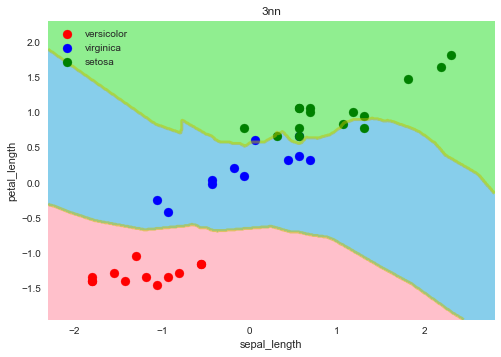

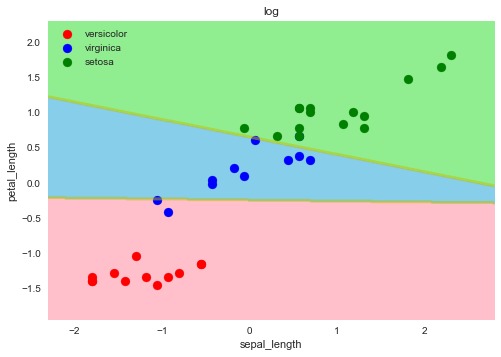

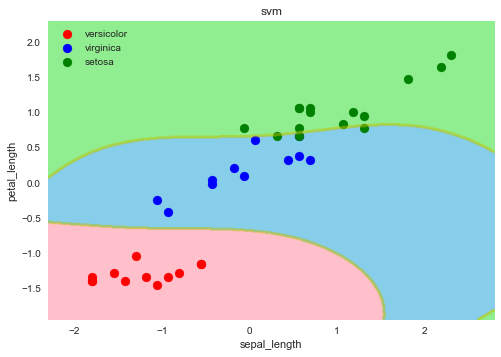

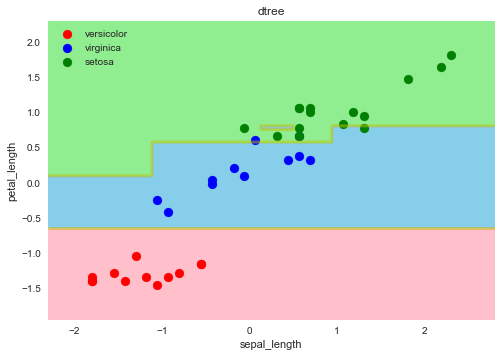

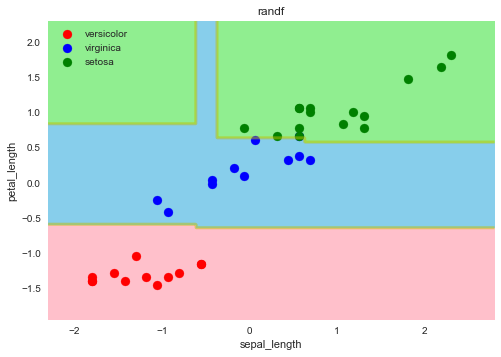

In [103]:
def calc_metrics(x,models,y_true):
    metric = pd.DataFrame(index=['acc','prec','rec','f1'], columns=['3nn','log','svm','dtree','randf'])
    for i in range(len(models)):
        y_pred = models[i].predict(x) 
        metric.iloc[0,i]=accuracy_score(y_true, y_pred)
        metric.iloc[1,i]=precision_score(y_true, y_pred,average='macro')
        metric.iloc[2,i]=recall_score(y_true, y_pred,average='macro')
        metric.iloc[3,i]=f1_score(y_true, y_pred,average='macro')
        decision_region1(x,y_true,model=models[i],title=metric.columns[i],xlabel='sepal_length',ylabel='petal_length')
    return metric
knc2 = KNeighborsClassifier(n_neighbors=3).fit(xs_train,y_train)
logreg2 = LogisticRegression(random_state=0).fit(xs_train, y_train)
svm2 = make_pipeline(StandardScaler(), SVC(gamma='auto')).fit(xs_train, y_train)
dt2 = DecisionTreeClassifier(random_state=0).fit(xs_train,y_train)
rf2 = RandomForestClassifier(max_depth=2, random_state=0).fit(xs_train,y_train)
model_list = [knc2,logreg2,svm2,dt2,rf2]
metrics4 = calc_metrics(xs_test,model_list,y_test)

In [104]:
metrics4

,3nn,log,svm,dtree,randf
acc,0.894737,0.921053,0.921053,0.921053,0.973684
prec,0.894949,0.931548,0.928571,0.925,0.979167
rec,0.894949,0.909091,0.933333,0.917172,0.969697
f1,0.894949,0.910975,0.922963,0.920123,0.973374


With 2 features and 3 target values, best performance of f1-score 0.973. <br\>
Random forest performs best. 